# 10. Markov Chains and Random Structures

## [Inference Theory 1](https://lamastex.github.io/scalable-data-science/infty/2018/01/)

&copy;2018 Raazesh Sainudiin. [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

**Markov chain**, named after [Andrey Markov](http://en.wikipedia.org/wiki/Andrey_Markov), is a mathematical model for a possibly dependent sequence of random variables. Intuitively, a Markov Chain is a system which "jumps" among several states, with the next state depending (probabilistically) only on the current state. A useful heuristic is that of a frog jumping among several lily-pads, where the frog's memory is short enough that it doesn't remember what lily-pad it was last on, and so its next jump can only be influenced by where it is now.

Formally, the Markov property states that the conditional probability distribution for the system at the next step (and in fact at all future steps) given its current state depends only on the current state of the system, and not additionally on the state of the system at previous steps:

$$P(X_{n+1} \ | \, X_1,X_2,\dots,X_n) = P(X_{n+1}|X_n). \,$$
Since the system changes randomly, it is generally impossible to predict the exact state of the system in the future. However, the statistical and probailistic properties of the system's future can be predicted. In many applications it is these statistical properties that are important.

### Formal definition and terms

A Markov chain is a sequence of random variables $X_1, X_2, X_3, \ldots$ with the Markov property, namely that, given the present state, the future and past states are independent. Formally,

$$P(X_{n+1}=x \ | \ X_1=x_1, X_2=x_2 \ldots, X_n=x_n) = P(X_{n+1}=x|X_n=x_n).\,$$

The possible values of $X_i$ or the set of all states of the system form a countable set $\mathbb{X}$ called the state space of the chain.

The changes of state of the system are called transitions, and the probabilities associated with various state-changes are called transition probabilities.

Markov chains are often depicted by a weighted directed graph, where the edges are labeled by the probabilities of going from one state to the other states. This is called the flow diagram or transition probability diagram.  The transition probability matrix $\mathbf{P}$ encodes the probabilities associated with state-changes or "jumps" from one state to another in the state-space $\mathbb{X}$. If $\mathbb{X}$ is labelled by $\{0,1,2,\ldots\}$ then the $i,j$-th entry in the matrix $\mathbf{P}$ corresponds to the probability of going from state $i$ to state $j$ in one time-step.

$$\mathbf{P} = \begin{bmatrix} p_{0,0} & p_{0,1} & p_{0,2} & \ldots \\ p_{1,0} & p_{1,1} & p_{1,2} & \ldots \\ p_{2,0} & p_{2,1} & p_{2,2} & \ldots \\ \vdots & \vdots & \vdots & \ddots \end{bmatrix}$$

The state of the system at the $n$-th time step is described by a state probability vector $$\mathbf{p}^{(n)} = \left( \mathbf{p}^{(n)}_0, \mathbf{p}^{(n)}_1, \mathbf{p}^{(n)}_2,\ldots \right)$$ Thus, $\mathbf{p}^{(n)}_i$ is the probability you will find the Markov chain at state $i \in \mathbb{X}$ at time-step $n$ and $\mathbf{p}^{(0)}_i$ is called the initial probability vector at the convenient initial time $0$.

 

The state space $\mathbb{X}$ and transition probability matrix $\mathbf{P}$ completely characterizes a Markov chain.

## Example 1: Dry-Wet chain, a toy weather model 
### A SageMath break-down of the [Wiki Example](https://en.wikipedia.org/wiki/Examples_of_Markov_chains#A_simple_weather_model)


In [15]:
def showURL(url, ht=500):
    """Return an IFrame of the url to show in notebook with height ht"""
    from IPython.display import IFrame
    return IFrame(url, width='95%', height=ht) 
showURL('https://en.wikipedia.org/wiki/Examples_of_Markov_chains#A_simple_weather_model',400)

We can coarsely describe the weather of a given day by a toy model that states if it is "wet" or "dry". Each day the weather in our toy model is an element of our state space

$$\mathbb{X} = \{\text{"wet"}, \text{"dry"}\}.$$
We can make a picture of our toy probability model with a flow diagram or transition probability diagram as follows:

 

<img src="images/DryWet.png" width=400>

The probabilities of weather conditions, given the weather on the preceding day, can be represented by a transition probability matrix:

$$\mathbf{P} = \begin{bmatrix} 0.9 & 0.1\\ 0.5 & 0.5 \end{bmatrix}$$

The matrix $\mathbf{P}$ represents our toy weather model in which a dry day is 90% likely to be followed by another dry day, and a wet or rainy day is 50% likely to be followed by another wet day. The columns can be labelled "dry" and "wet" respectively, and the rows can be labelled in the same manner. For convenience, we will use integer labels $0$ and $1$ for "dry" and "wet", respectively.

$(\mathbf{P})_{i j}=p_{i,j}$ is the probability that, if a given day is of type $i$, it will be followed by a day of type $j$.

Since the transition probability matrix $\mathbf{P}$ is a stochastic matrix:

 

The rows of $\mathbf{P}$ sum to $1$.
The probabiltites in each row can be thought of as "current-state" specific $de~Moivre(p_{i,j}'s)$ distribution
Basically, you toss a current-state-specific many-faced weigted die to determine the next state
How can we think of our toy weather model in terms of two Bernouli trials; $Bernoulli(0.9)$ and $Bernoulli(0.5)$? -- recall a fair coin in the wet pocket and the biased coin in the dry pocket analogy from lectures...
 

How do we represent a matrix $\mathbf{P}$ in Sage?

In [16]:
?matrix # we have encountered matrix already

Let's construct and assign the matrix to `P`. 

We could have used `QQ` instead of `RR` below if the probabilities are rational and if we had a need for exact rational arithmetic.

In [17]:
P = matrix(RR,[[9/10,1/10],[1/2,1/2]])   
P               # display P

[0.900000000000000 0.100000000000000]
[0.500000000000000 0.500000000000000]

In [18]:
P[0,1]   # recall accessing (i,j)-th entry of matrix P

0.100000000000000

In [19]:
# always know the parent of your matrix type
P.parent()

Full MatrixSpace of 2 by 2 dense matrices over Real Field with 53 bits of precision

## Predicting the weather with our Dry-Wet chain

The weather on day 0 is known to be dry. This is represented by a probability vector in which the "dry" entry is 100%, and the "wet" entry is 0%:

$$ \mathbf{p}^{(0)} = \begin{bmatrix} 1 & 0 \end{bmatrix} $$
The weather on day 1 can be predicted by:

$$ \mathbf{p}^{(1)} = \mathbf{p}^{(0)} \ \mathbf{P} = \begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} 0.9 & 0.1 \\ 0.5 & 0.5 \end{bmatrix} = \begin{bmatrix} 0.9 & 0.1 \end{bmatrix} $$

Thus, there is an 90% chance that day 1 will also be sunny.

In [20]:
p0 = vector((1,0))    # initial probability vector for a dry day zero
p0

(1, 0)

In [21]:
p1 = p0*P                  # left multiply the matrix by the state prob vector
p1

(0.900000000000000, 0.100000000000000)

The weather on day 2 can be predicted in the same way:

$$\mathbf{p}^{(2)} =\mathbf{p}^{(1)} \ \mathbf{P} = \mathbf{p}^{(0)} \ \mathbf{P}^2 = \begin{bmatrix} 1 & 0 \end{bmatrix} \ \begin{bmatrix} 0.9 & 0.1 \\ 0.5 & 0.5 \end{bmatrix}^2 = \begin{bmatrix} 0.86 & 0.14 \end{bmatrix}$$
or, equivalently,

$$ \mathbf{p}^{(2)} =\mathbf{p}^{(1)} \ \mathbf{P} = \begin{bmatrix} 0.9 & 0.1 \end{bmatrix} \ \begin{bmatrix} 0.9 & 0.1 \\ 0.5 & 0.5 \end{bmatrix} = \begin{bmatrix} 0.86 & 0.14 \end{bmatrix} $$
How do we do this in Sage?

In [22]:
p2 = p0*P^2       # left multiply the initial probability vector by square of P
p2                # disclose the probability vector at time-step 2

(0.860000000000000, 0.140000000000000)

or, equivalently,

In [23]:
p2 = p1*P  # left multiply the probability vector at time-step 1 by P

# disclose the probability vector at time-step 2 (compare output of previous cell)
p2

(0.860000000000000, 0.140000000000000)

General rules for day $n$ follow from mathematical induction aas follows:

$$ \mathbf{p}^{(n)} = \mathbf{p}^{(n-1)} \ \mathbf{P} $$
$$ \mathbf{p}^{(n)} = \mathbf{p}^{(0)} \ \mathbf{P}^n $$
How do we operate with a matrix in SageMath to do this for any given $n$?

In [24]:
n = 3                     # assign some specific time-step or day
dry_p0 = vector((1,0))    # initial probability vector for a dry day zero
pn = dry_p0 * P^n         # probability vector for day n
pn                        # display it

(0.844000000000000, 0.156000000000000)

In [25]:
n = 3                     # assign some specific time-step or day
wet_p0 = vector((0,1))    # initial probability vector for a wet day zero
pn = wet_p0 * P^n         # probability vector for day n
pn                        # display it

(0.780000000000000, 0.220000000000000)

Let's get the state probability vector at time n = 0,1,...,nmax

In [26]:
nmax = 3             # maximum number of days or time-steps of interest
[(n, vector((0,1)) * P^n ) for n in range(nmax+1)] 

[(0, (0.000000000000000, 1.00000000000000)),
 (1, (0.500000000000000, 0.500000000000000)),
 (2, (0.700000000000000, 0.300000000000000)),
 (3, (0.780000000000000, 0.220000000000000))]

In the next interact let's visualize the $n$-step state probability vector $\mathbf{p}^{(n)}=(\mathbf{p}^{(n)}_0,\mathbf{p}^{(n)}_1)$, $n=0,1,\ldots, {\tt nmax}$ steps


See what's going on here...? 

Try to increase `nmax` and see where the state prob vector is going geometrically.

In [27]:
@interact
def nStepProbVec(nmax=(2,(1..20))):
    # maximum number of time-steps of interest
    # the next line is just html figure heading
    # now we will plot the prob vectors 
    # the red points start on a dry day 0
    pns_plot = point([vector((1,0)) * P^n  for n in range(nmax+1)],color='red')
    pns_plot += line([vector((1,0)) * P^n  for n in range(nmax+1)],color='red')
    # the blue points start on a wet day 0
    pns_plot += point([vector((0,1)) * P^n  for n in range(nmax+1)],color='blue')
    pns_plot += line([vector((0,1)) * P^n  for n in range(nmax+1)],color='blue')
    # suppose we had initial state prob vector (0.833,0.167) then where do we go
    pns_plot += point([vector((0.833,0.167)) * P^n  for n in range(nmax+1)],color='black')
    pns_plot += line([vector((0.833,0.167)) * P^n  for n in range(nmax+1)],color='black')
    pns_plot.show(figsize=[8,3],
              axes_labels=['$\mathbf{p}^{(n)}_0$','$\mathbf{p}^{(n)}_1$'])

## Steady state of the weather in our Dry-Wet chain

In this example, predictions for the weather on more distant days are increasingly inaccurate and tend towards a steady state vector. This vector represents the probabilities of dry and wet weather on all days, and is independent of the initial weather.

The steady state vector is defined as:

$$\mathbf{s} = \lim_{n \to \infty} \mathbf{p}^{(n)}$$

but only converges to a strictly positive vector if $\mathbf{P}$ is a regular transition matrix (that is, there is at least one $\mathbf{P}^n$ with all non-zero entries making the Markov chain irreducible and aperiodic).

Since the $\mathbf{s}$ is independent from initial conditions, it must be unchanged when transformed by $\mathbf{P}$. This makes it an eigenvector (with eigenvalue $1$), and means it can be derived from $\mathbf{P}$. For our toy model of weather:

 

$$\begin{matrix} \mathbf{P} & = & \begin{bmatrix} 0.9 & 0.1 \\ 0.5 & 0.5 \end{bmatrix} \\ \mathbf{s} \ \mathbf{P} & = & \mathbf{s} & \mbox{(} \mathbf{s} \mbox{ is unchanged by } \mathbf{P} \mbox{.)} \\ & = & \mathbf{s} \ \mathbf{I} \\ \mathbf{s} \ (\mathbf{P} - \mathbf{I}) & = & \mathbf{0} \\ & = & \mathbf{s} \left( \begin{bmatrix} 0.9 & 0.1 \\ 0.5 & 0.5 \end{bmatrix} - \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \right) \\ & = & \mathbf{s} \begin{bmatrix} -0.1 & 0.1 \\ 0.5 & -0.5 \end{bmatrix} \end{matrix}$$ $$\begin{bmatrix} \mathbf{s}_0 & \mathbf{s}_1 \end{bmatrix} \begin{bmatrix} -0.1 & 0.1 \\ 0.5 & -0.5 \end{bmatrix} = \begin{bmatrix} 0 & 0 \end{bmatrix}$$
 


So $- 0.1 \mathbf{s}_0 + 0.5 \mathbf{s}_1 = 0$ and since they are a probability vector we know that $\mathbf{s}_0 + \mathbf{s}_1 = 1$.

Solving this pair of simultaneous equations gives the steady state distribution:

 

$$\left( \mathbf{s}_0 , \mathbf{s}_1 \right) = \left( 5/6 , 1/6 \right) = \left( 0.833 , 0.167 \right)$$
 

In conclusion, in the long term, 83% of days are dry.

How do we operate the above to solve for $\mathbf{s}$ in SageMath? There are two "methods". We can either use

- Method 1: solve a system of linear equations with `solve` to get $\mathbf{s}$ or
- Method 2: obtain $\mathbf{s}$ via eigen decomposition.

You are not expected to follow method 2 if you have not had been introduced to eigenvalues and eigenvectors.

 

## Method 1: Solving a system of equations to obtain $\mathbb{s}$.

In [28]:
#P = matrix(QQ,[[9/10,1/10],[1/2,1/2]]); P; P.parent()
P = matrix(RR,[[9/10,1/10],[1/2,1/2]]); P; P.parent()

Full MatrixSpace of 2 by 2 dense matrices over Real Field with 53 bits of precision

In [29]:
I=matrix(2,2,1); I; I.parent()      # the 2X2 identity matrix

Full MatrixSpace of 2 by 2 dense matrices over Integer Ring

In [30]:
P-I; (P-I).parent()

Full MatrixSpace of 2 by 2 dense matrices over Real Field with 53 bits of precision

In [31]:
s0, s1 = var('s0, s1')

In [32]:
eqs = vector((s0,s1)) * (P-I); eqs[0]; eqs[1]

0.100000000000000*s0 - 0.500000000000000*s1

In [33]:
solve([eqs[0] == 0, eqs[1]==0, s0+s1==1], s0,s1)

[[s0 == (5/6), s1 == (1/6)]]

In [34]:
solve([eqs[0] == 0, s0+s1==1], s0,s1)   # just use eqs[0]==0 since eqs[1]==0 is redundant

[[s0 == (5/6), s1 == (1/6)]]

In [35]:
solve([eqs[1]==0, s0+s1==1], s0,s1)   # just use eqs[1]==0 since eqs[0]==0 is redundant

[[s0 == (5/6), s1 == (1/6)]]

(End of Method 1 to solve for the steady state vector $\mathbf{s}$.)

---

### Method 2: 
Alternatively use eigen decomposition over rationals in SageMath to solve for $\mathbb{s}$. You may ignore this if you hove not seen eigen decomposition before. To follow Method 2 you need to know a bit more about [eigen values, eigen vectors and eigen spaces](http://en.wikipedia.org/wiki/Eigenvalue,_eigenvector_and_eigenspace) if you are interested.

Learn from Khan academy more slowly:
-[https://www.khanacademy.org/math/linear-algebra/alternate-bases/eigen-everything/v/linear-algebra-introduction-to-eigenvalues-and-eigenvectors](https://www.khanacademy.org/math/linear-algebra/alternate-bases/eigen-everything/v/linear-algebra-introduction-to-eigenvalues-and-eigenvectors)

Also, recall our visual interactive exploration of eigen values and eigen vectors here:

-[http://setosa.io/ev/eigenvectors-and-eigenvalues/](http://setosa.io/ev/eigenvectors-and-eigenvalues/).

In [36]:
P = matrix(QQ,[[9/10,1/10],[1/2,1/2]]); P; P.parent()

Full MatrixSpace of 2 by 2 dense matrices over Rational Field

In [37]:
P.eigenvalues()

[1, 2/5]

In [38]:
D, V = P.eigenmatrix_left()  # left eigen decomposition
D                            # diagonal matrix of eigen values

[  1   0]
[  0 2/5]

In [39]:
V                            # left eigen vectors

[  1 1/5]
[  1  -1]

In [40]:
# checking when we left-multiply by left-eigenvector 
# of eigenvalue 1 we get the output scaled by 1
V[0]; V[0]*P

(1, 1/5)

In [41]:
# checking when we left-multiply by left-eigenvector 
# of eigenvalue 2/5 we get the output scaled by 2/5
V[1]; V[1]*P

(2/5, -2/5)

In [42]:
V.inverse()*D*V

[9/10 1/10]
[ 1/2  1/2]

In [43]:
# checking that the eigen decomposition of P is indeed P
V*D*V.inverse()

[9/10 1/10]
[ 1/2  1/2]

In [44]:
EigVecForEigValue1 = V[0]; EigVecForEigValue1

(1, 1/5)

In [45]:
EigVecForEigValue1.norm(1)  # normalization factor

6/5

In [46]:
# normalize to make it a probability vector
EigVecForEigValue1 / EigVecForEigValue1.norm(1)

(5/6, 1/6)

(End of Method 2.)

---

In [199]:
import urllib2 as U
import numpy as np
wetdataURL = 'http://www.math.canterbury.ac.nz/php/lib/cliflo/rainfall.php'
wetdata = U.urlopen(wetdataURL).readlines()
datalines=[]
for a_line in wetdata:
    #print a_line
    temp = a_line.replace('\n','').split(',')
    temp = [float(q) for q in temp if q != ',']
    datalines.append(temp)
chcRainfallData=np.array(datalines)

In [48]:
import numpy as np
# in case the url fetch fails use the CSV backup in 'data/rainfallInChristchurch.csv'
#import numpy as np
chcRainfallData = np.genfromtxt ('data/rainfallInChristchurch.csv', delimiter=",")
## Yeah, this is a much easier way to read a csv file into numpy array! 
## But this data was preformatted with no errors during type conversion

In [49]:
len(chcRainfallData)

25044

In [50]:
chcRainfallData[0:10] 

array([[ 19430802.,         0.],
       [ 19430803.,         0.],
       [ 19430804.,         0.],
       [ 19430805.,         0.],
       [ 19430806.,         0.],
       [ 19430807.,         0.],
       [ 19430808.,         0.],
       [ 19430809.,         0.],
       [ 19430810.,         0.],
       [ 19430811.,         0.]])

In [51]:
chcRainfallData[-1] # the data goes from 1943 August 02 to 2012 May 06

array([ 20120506.,         0.])

In [52]:
@interact
def chch_precipitation(start_date = slider(0,len(chcRainfallData)-1,1,len(chcRainfallData)-100), end_date = slider(0,len(chcRainfallData)-1,1,len(chcRainfallData)-1)):
    sel_data = chcRainfallData[start_date:end_date]
    c_max = max([q[1] for q in sel_data])
    c_min = min([q[1] for q in sel_data])
    sel_daysdata = [[i,sel_data[i][1]] for i in range(len(sel_data))]
    show(list_plot(sel_daysdata, plotjoined=True, rgbcolor=(0,0,1)) , ymin = c_min-2, axes = True, ymax = c_max+3, frame = False, axes_labels=['days', 'mm'], figsize=(8,4))

In [53]:
xx=chcRainfallData[200:210]; xx

array([[  1.94402180e+07,   5.00000000e-01],
       [  1.94402190e+07,   0.00000000e+00],
       [  1.94402200e+07,   0.00000000e+00],
       [  1.94402210e+07,   0.00000000e+00],
       [  1.94402220e+07,   5.30000000e+00],
       [  1.94402230e+07,   0.00000000e+00],
       [  1.94402240e+07,   0.00000000e+00],
       [  1.94402250e+07,   0.00000000e+00],
       [  1.94402260e+07,   0.00000000e+00],
       [  1.94402270e+07,   1.30000000e+00]])

In [54]:
[xx[i][1] for i in range(len(xx))]

[0.5, 0.0, 0.0, 0.0, 5.2999999999999998, 0.0, 0.0, 0.0, 0.0, 1.3]

In [55]:
[xx[i][1]>0 for i in range(len(xx))]

[True, False, False, False, True, False, False, False, False, True]

In [56]:
[int(xx[i][1]>0) for i in range(len(xx))] # now we have wet=1 and dry=0 days

[1, 0, 0, 0, 1, 0, 0, 0, 0, 1]

Grab all the days data from start to end:

In [57]:
 # all the data as 0s and 1s
all_daysdata = [[i,int(chcRainfallData[i][1]>0)] for i in range(len(chcRainfallData))]

In [58]:
all_daysdata[-3:-1]

[[25041, 0], [25042, 0]]

Interactive cell to allow you to select some specific data and turn it into the list of 0 or 1 tuples (this list will then be available in `sel_daysdata` in later cells in the worksheet).

#### Daily Precipitation at Christchurch, fed from NIWA data (NZ's equivalent of US's NOAA)

In [59]:
@interact
def chch_wetdry(output = checkbox(False, "Print out selected Data?"),start_date = slider(0,len(chcRainfallData)-1,1,len(chcRainfallData)-100), end_date = slider(0,len(chcRainfallData)-1,1,len(chcRainfallData)-1)):
    global sel_daysdata  # made it a global so it is easy to choose data
    sel_data = chcRainfallData[start_date:end_date]
    sel_daysdata = [[i,int(sel_data[i][1]>0)] for i in range(len(sel_data))]
    show(list_plot(sel_daysdata, plotjoined=True, rgbcolor=(0,0,1)) , ymin = 0, axes = True, ymax = +1, frame = False, axes_labels=['days', 'wet/dry'], figsize=(8,3))
    if(output):
        print sel_daysdata

In [60]:
print(sel_daysdata)

[[0, 0], [1, 0], [2, 0], [3, 1], [4, 1], [5, 1], [6, 0], [7, 0], [8, 0], [9, 0], [10, 0], [11, 0], [12, 1], [13, 1], [14, 0], [15, 0], [16, 0], [17, 0], [18, 1], [19, 1], [20, 1], [21, 1], [22, 0], [23, 1], [24, 0], [25, 0], [26, 0], [27, 0], [28, 1], [29, 1], [30, 1], [31, 1], [32, 0], [33, 0], [34, 0], [35, 1], [36, 0], [37, 0], [38, 1], [39, 1], [40, 0], [41, 1], [42, 1], [43, 0], [44, 0], [45, 0], [46, 0], [47, 0], [48, 1], [49, 1], [50, 0], [51, 1], [52, 1], [53, 0], [54, 0], [55, 0], [56, 0], [57, 0], [58, 1], [59, 0], [60, 0], [61, 0], [62, 0], [63, 0], [64, 0], [65, 0], [66, 1], [67, 0], [68, 0], [69, 0], [70, 0], [71, 0], [72, 1], [73, 1], [74, 1], [75, 0], [76, 0], [77, 0], [78, 0], [79, 0], [80, 1], [81, 0], [82, 0], [83, 0], [84, 0], [85, 0], [86, 0], [87, 0], [88, 0], [89, 0], [90, 1], [91, 1], [92, 0], [93, 1], [94, 0], [95, 1], [96, 0], [97, 0], [98, 0]]


In [61]:
x0ton = [sel_daysdata[i][1] for i in range(len(sel_daysdata))]
print(x0ton)

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0]


In [62]:
len(x0ton)

99

### Maximum likelihood estimation of the unknown transition probabilities 
#### for the Dry-Wet Markov chain model of Christchurch weather

In the example we have been working with earlier, the transition probabilities were given by the matrix $$\mathbf{P}=\begin{bmatrix} 0.9 & 0.1\\0.5&0.5\end{bmatrix}$$ and we simply used the given $\mathbf{P}$ to understand the properties and utilities of the probability model for a possibly dependent sequence of $\{0,1\}$-valued random variables encoding the $\{\text{Dry},\text{Wet}\}$ days, respectively.

What we want to do now is use the data from Christchurch's Aeroclub obtained from NIWA to estimate Christchurch's unknown transition probability matrix $$\mathbf{P}= \begin{bmatrix} p_{0,0} & p_{0,1}\\ p_{1,0} & p_{1,1} \end{bmatrix}.$$ Let us use the principle of maximum likelihood and derive the maximum likelihood estimator $$\widehat{\mathbf{P}}=\begin{bmatrix} \hat{p}_{0,0} & \hat{p}_{0,1}\\ \hat{p}_{1,0} & \hat{p}_{1,1}\end{bmatrix}.$$

Recall that the likelihood function $$L(\text{unknown parameters} \ ; \ \text{Data})$$ is essentially the joint density of the data $X_0,X_1,X_2,\ldots,X_n$ as a function of the parameters. The data gives $n+1$ consecutive days of Dry or Wet recordings as $0$ or $1$ at the Christchurch's Aeroclub. What are the unknown parameters here? Well, they are the four entries $(p_{0,0}, p_{0,1}, p_{1,0}, p_{1,1})$ of the unknown $\mathbf{P}$. But, due to the fact that $\mathbf{P}$ is not any old matrix of real numbers, but rather a stochastic matrix, it is constrained so that the entries are non-negative and the entries of each row sums to $1$. For instance we can write the off-diagonal entries in terms of the diagonal entries $p_{0,1}=1-p_{0,0}$ and $p_{1,0}=1-p_{1,1}$ and merely treat two parameters $(p_{0,0},p_{1,1})$ as the truly unknowns that can take any value in the unit square $[0,1] \times [0,1]$ parameter space. 

$$
\begin{eqnarray*} L(p_{0,0},p_{1,1}) &=& L(p_{0,0},p_{1,1}; x_0,x_1,\ldots,x_n)\\ 
&=& P\left( X_0=x_0,X_1=x_1,\ldots,X_{n-1}=x_{n-1},X_n=x_n \right) 
\end{eqnarray*}
$$ 

In the above equation, we are given that the transition probabilities are $p_{0,0},p_{1,1}$. 

Now, by definition of conditional probability and the markov property, 

$$
\scriptsize{
\begin{eqnarray*} L(p_{0,0},p_{1,1}) &=& P\left( X_n=x_n \ | \ X_{n-1}=x_{n-1},\ldots,X_2=x_2,X_1=x_1,X_0=x_0 \right) \ P\left( X_{n-1}=x_{n-1},\ldots,X_2=x_2,X_1=x_1,X_0=x_0 \right)\\ 
&=& P\left( X_n=x_n \ | \ X_{n-1}=x_{n-1}\right) \ P\left( X_{n-1}=x_{n-1},\ldots,X_2=x_2,X_1=x_1,X_0=x_0 \right) \\ 
&=& P\left( X_n=x_n \ | \ X_{n-1}=x_{n-1}\right) \ P\left( X_{n-1}=x_{n-1} \ | \ X_{n-2}=x_{n-2}, X_{n-3}=x_{n-3},\ldots,X_2=x_2,X_1=x_1,X_0=x_0 \right) \\ 
& & \qquad \qquad \qquad P\left(X_{n-2}=x_{n-2}, X_{n-3}=x_{n-3},\ldots,X_2=x_2,X_1=x_1,X_0=x_0 \right) \\ 
&=& P\left( X_n=x_n \ | \ X_{n-1}=x_{n-1}\right) \ P\left( X_{n-1}=x_{n-1} \ | \ X_{n-2}=x_{n-2} \right) \ P\left(X_{n-2}=x_{n-2}, X_{n-3}=x_{n-3},\ldots,X_2=x_2,X_1=x_1,X_0=x_0 \right) \\ &\vdots&\\ 
&=& P\left( X_n=x_n \ | \ X_{n-1}=x_{n-1}\right) \ P\left( X_{n-1}=x_{n-1} \ | \ X_{n-2}=x_{n-2} \right) \ \cdots \ P\left( X_{2}=x_{2} \ | \ X_{1}=x_{1} \right) \ P\left( X_{1}=x_{1} \ | \ X_{0}=x_{0} \right) P(X_{0}=x_{0})\\ 
&=& P(X_{0}=x_{0}) \ \prod_{i=1}^n P \left( X_i=x_i \ | \ X_{i-1}=x_{i-1} \right) \\ 
&=& \left( p_{0,0} \right)^{n_{0,0}} \ \left( 1-p_{0,0} \right)^{n_{0,1}} \ \left( p_{1,1} \right)^{n_{1,1}} \ \left( 1-p_{1,1} \right)^{n_{1,0}} ,\\ 
\end{eqnarray*} 
}
$$ 

where, $n_{i,j}$ is the number of transitions from state $i$ to state $j$ in the observed data sequence $x_0,x_1,\ldots,x_n$. Therefore the log likelihood function is 
$$ 
\begin{eqnarray*} l(p_{0,0},p_{1,1}) &=& \log \left( L(p_{0,0},p_{1,1}) \right) \\
&=& \log \left( \left( p_{0,0} \right)^{n_{0,0}} \ \left( 1-p_{0,0} \right)^{n_{0,1}} \ \left( p_{1,1} \right)^{n_{1,1}} \ \left( 1-p_{1,1} \right)^{n_{1,0}} \right) \\
&=& {n_{0,0}} \log \left( p_{0,0} \right) + {n_{0,1}} \log \left( 1 - p_{0,0} \right) + {n_{1,1}} \log \left( p_{1,1} \right) + {n_{1,0}} \log \left( 1-p_{1,1} \right) \end{eqnarray*} 
$$ 

Finally, we can find the maximum likelihood estimates (MLEs) $\widehat{p}_{0,0}$ and $\widehat{p}_{1,1}$ for the unknown transition probabilities $p_{0,0}$ and $p_{1,1}$ by differentiating the loglikelihood function with respect to $p_{0,0}$ and $p_{1,1}$, respectively, and solving the resulting equations in terms of the variable of differentiation. This will yield the following which me can also obtain symbolically in sage. 
$$ 
\begin{eqnarray*} 
\frac{d}{d p_{0,0}} \left( l(p_{0,0},p_{1,1}) \right) &=& \frac{d}{d p_{0,0}} \left( {n_{0,0}} \log \left( p_{0,0} \right) + {n_{0,1}} \log \left( 1 - p_{0,0} \right) + {n_{1,1}} \log \left( p_{1,1} \right) + {n_{1,0}} \log \left( 1-p_{1,1} \right) \right) \\ 
&=& \cdots \\ &=& \frac{n_{0,0}}{p_{0,0}} - \frac{n_{0,1}}{1-p_{0,0}} 
\end{eqnarray*} 
$$ 

Similarly, 
$$ 
\begin{eqnarray*} \frac{d}{d p_{1,1}} \left( l(p_{0,0},p_{1,1}) \right) &=& \frac{d}{d p_{1,1}} \left( {n_{0,0}} \log \left( p_{0,0} \right) + {n_{0,1}} \log \left( 1 - p_{0,0} \right) + {n_{1,1}} \log \left( p_{1,1} \right) + {n_{1,0}} \log \left( 1-p_{1,1} \right) \right) \\ 
&=& \cdots \\ &=& \frac{n_{1,1}}{p_{1,1}} - \frac{n_{1,0}}{1-p_{1,1}} 
\end{eqnarray*} 
$$ 

Finally, solving the above equations in terms of $p_{0,0}$ and $p_{1,1}$ gives the MLEs that 
$$\widehat{p}_{0,0} = \frac{n_{0,0}}{n_{0,0}+n_{0,1}} \quad \text{and} \quad \widehat{p}_{1,1} = \frac{n_{1,1}}{n_{1,0}+n_{1,1}}
$$ 
as follows: 
$$ \begin{eqnarray*} \frac{d}{d p_{0,0}} \left( l(p_{0,0},p_{1,1}) \right) &=& 0 \\ 
&\Leftrightarrow& \frac{n_{0,0}}{p_{0,0}} - \frac{n_{0,1}}{1-p_{0,0}} = 0\\ 
&\Leftrightarrow& p_{0,0} = \frac{n_{0,0}}{n_{0,0}+n_{0,1}} \end{eqnarray*} 
$$ 
and 
$$ 
\begin{eqnarray*} \frac{d}{d p_{1,1}} \left( l(p_{0,0},p_{1,1}) \right) &=& 0 \\
&\Leftrightarrow& \frac{n_{1,1}}{p_{1,1}} - \frac{n_{1,0}}{1-p_{1,1}} = 0\\
&\Leftrightarrow& p_{1,1} = \frac{n_{1,1}}{n_{1,0}+n_{1,1}} \end{eqnarray*} 
$$

Let's make symbolic expressions for this log likelihood function:

In [63]:
var('p00, p11, n00, n01, n10, n11') # declare variables
# assign the symbolic expression for the log likelihood function to L
L=n00*log(p00) + n01*log(1-p00) + n11*log(p11) + n10*log(1-p11)

In [64]:
L.diff(p00)  # differentiate log likelihood symbolically with respect to p00

n01/(p00 - 1) + n00/p00

In [65]:
L.diff(p11)  # differentiate log likelihood symbolically with respect to p11

n10/(p11 - 1) + n11/p11

In [66]:
solve(L.diff(p00)==0, p00)  # solve the equation in terms of p00 to get MLE

[p00 == n00/(n00 + n01)]

In [67]:
solve(L.diff(p11)==0, p11)  # solve the equation in terms of p11 to get MLE

[p11 == n11/(n10 + n11)]

In [68]:
x0ton = [sel_daysdata[i][1] for i in range(len(sel_daysdata))]
transitions_data =[(x0ton[i],x0ton[i+1]) for i in range(0,len(x0ton)-1,1)]
#transitions_data

In [69]:
def makeFreqDict(myDataList):
    '''Make a frequency mapping out of a list of data.
    
    Param myDataList, a list of data.
    Return a dictionary mapping each unique data value to its frequency count.'''
       
    freqDict = {} # start with an empty dictionary
        
    for res in myDataList:
        
        if res in freqDict: # the data value already exists as a key
                freqDict[res] = freqDict[res] + 1 # add 1 to the count using sage integers
        else: # the data value does not exist as a key value
            freqDict[res] = 1 # add a new key-value pair for this new data value, frequency 1
        
    return freqDict # return the dictionary created

# end of makeFreqDict(...)

In [70]:
transition_counts = makeFreqDict(transitions_data)
transition_counts

{(0, 0): 48, (0, 1): 17, (1, 0): 17, (1, 1): 16}

In [71]:
n_00 = transition_counts[(0,0)]
n_01 = transition_counts[(0,1)]
n_10 = transition_counts[(1,0)]
n_11 = transition_counts[(1,1)]
n_00, n_01, n_10, n_11

(48, 17, 17, 16)

Make a function to make a transition counts matrix from any list of 0/1 tuples passed in. 

In [72]:
def makeTransitionCounts(theData):
    '''Return a transition counts matrix from a list of tuples representing transitions between 2 states 0 and 1.
    
    Param theData is a list of tuples where the tuples can be (0,0) or (0,1) or (1,0) or (1,1).
    Return a 2x2 matrix [[count of (0,0), count of (0,1)],[count of (1,0), count of (1,1)]].'''
    
    retMatrix = matrix([[0,0],[0,0]]) # default counts
    x0ton = [theData[i][1] for i in range(len(theData))]
    transitions_data =[(x0ton[i],x0ton[i+1]) for i in range(0,len(x0ton)-1,1)]
    transition_counts = makeFreqDict(transitions_data)
    #keysToFind = [(0,0),(0,1),(1,0),(1,1)]
    # we will get an error if we try to access a value for a key that is not in the dictionary
    # so we need to check if each of the keys we might find is in the dictionary
    # and only try to access the count if the key is there 
    for i in [0,1]:  
        for j in [0,1]:
            if (i,j) in transition_counts:
                retMatrix[i,j] = transition_counts[(i,j)]
            # else the value in the matrix [i,j] stays as 0    
    return retMatrix

Get the transition counts matrix for all the data (we will get the same as we had before, but as a matrix which echoes the layout of our transition probabilities matrix, and we would also be able to use our function for other lists of tuples):

In [73]:
allTransitionCounts = makeTransitionCounts(all_daysdata)
allTransitionCounts

[12334  4094]
[ 4094  4521]

Make a function to turn transitions counts into a matrix of values for:

$$\widehat{\mathbf{P}}=\begin{bmatrix} \hat{p}_{0,0} & \hat{p}_{0,1}\\ \hat{p}_{1,0} & \hat{p}_{1,1}\end{bmatrix}.$$

In [74]:
def makeMLEMatrix(tcMatrix):
    '''Return an MLE Matrix from given 2-state transition count data.
    
    Param tcMatrix is a 2x2 matrix of transition counts. 
    Returns MLE matrix as 
    [[n_00/(n_00+n_01), n_01/(n_00+n_01)], [n_10/(n_10+n_11), n_11/(n_10+n_11)]].
    Returns None if there is not at least one count in each row of tcMatrix.'''
    
    retValue = None
    if (tcMatrix[0] > 0) and (tcMatrix[1] > 0):   
        retValue = matrix(RR,[[tcMatrix[0,0]/(tcMatrix[0,0]+tcMatrix[0,1]), tcMatrix[0,1]/(tcMatrix[0,0]+tcMatrix[0,1])],[tcMatrix[1,0] / (tcMatrix[1,0]+tcMatrix[1,1]), tcMatrix[1,1]/(tcMatrix[1,0]+tcMatrix[1,1])]])
    return retValue

Look at this for all the data:

In [75]:
allDataMLEMatrix = makeMLEMatrix(allTransitionCounts)
allDataMLEMatrix

[0.750791331872413 0.249208668127587]
[0.475217643644806 0.524782356355194]

In [76]:
P                  # compare to made up probs in toy model

[9/10 1/10]
[ 1/2  1/2]

As we said before, we can concentrate just on two unknowns $(\hat{p}_{0,0},\hat{p}_{1,1})$, so we can make a function just to return this tuple:

In [77]:
def makeMLE00And11(tcMatrix):
    '''Return an MLE tuple (p00, p11) from given 2-state transition count data.
    
    Param tcMatrix is a 2x2 matrix of transition counts. 
    Returns (n_00/(n_00+n_01, n_11/(n_10+n_11) from tcMatrix.
    Returns null if there is not at least one count in each row of tcMatrix. '''
    
    retValue = None
    if (tcMatrix[0] > 0) and (tcMatrix[1] > 0):   
        retValue = (RR(tcMatrix[0,0]/(tcMatrix[0,0]+tcMatrix[0,1])), RR(tcMatrix[1,1]/(tcMatrix[1,0]+tcMatrix[1,1])))
    return retValue

What is $(\hat{p}_{0,0},\hat{p}_{1,1})$ using all our data?

In [78]:
allDataMLE00And11 = makeMLE00And11(allTransitionCounts)
allDataMLE00And11

(0.750791331872413, 0.524782356355194)

We can use our log-likelihood function in the form of a Sage symbolic function with symbolic variables n00, n01, n10, n11, p00, p01, and substitute in the values we have just found, using all our data, for all of these variables, to find the maximum of the log-likelihood function (i.e. the value of the function evaluated at the MLE).

#### Animation of the MLE and contour of log-likelihood function as the amount of data increases
Here is a plot of $(\hat{p}_{00},\hat{p}_{11})$, moving as the amount of data increases.  It loops continually so if it looks like it is not moving, it is towards the end when the MLE has settled down - just wait a short while and the loop will start again:

 
<table style="width:100%">
  <tr>
  <th>MLE as the amount of data increases</th>
  <th>log-likelihood contour with the MLE (black dot)</th>
  <tr>
    <th><img src="images/pMLEp00p11Anim.gif" width=300></th>
    <th><img src="images/contourLikAnim.gif" width=300></th> 
  </tr>
</table>


In [79]:
maxLogL= L.subs(n00=allTransitionCounts[0,0], n01=allTransitionCounts[0,1], n10=allTransitionCounts[1,0], n11=allTransitionCounts[1,1], p00=allDataMLE00And11[0], p11=allDataMLE00And11[1])
maxLogL # this is the ML value

-15184.6089012140

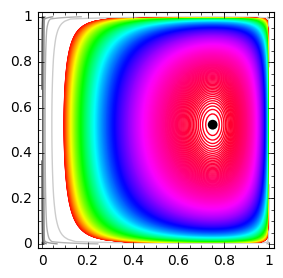

In [80]:
#maxLogL= L.subs(n00=allTransitionCounts[0,0], n01=allTransitionCounts[0,1], n10=allTransitionCounts[1,0], n11=allTransitionCounts[1,1], p00=allDataMLE00And11[0], p11=allDataMLE00And11[1])
# make a list of contours
ourContours = list([maxLogL-2*i for i in range(0,10000,20)])
ourContours.reverse() # contours need to be appropriately ordered
# make a contour plot
cp=contour_plot(L.subs(n00=allTransitionCounts[0,0], n01=allTransitionCounts[0,1], n10=allTransitionCounts[1,0], n11=allTransitionCounts[1,1]), (p00, 0.0001, .9999), (p11, .0001, .9999),fill=False, aspect_ratio=1, contours=10)
cp+=contour_plot(L.subs(n00=allTransitionCounts[0,0], n01=allTransitionCounts[0,1], n10=allTransitionCounts[1,0], n11=allTransitionCounts[1,1]), (p00, 0.0001, .9999), (p11, .0001, .9999),fill=False, aspect_ratio=1,contours=ourContours, cmap='hsv')
cp+=point(allDataMLE00And11,pointsize=50,rgbcolor='black')
cp.show(figsize=(3,3))

**You Think**: What is the MLE of $\theta$ in an product $Bernoulli(\theta)$ experiment for the problem, i.e., we now model $$X_0,X_1,\ldots,X_n \overset{IID}{\thicksim} Bernoulli(\theta^*)$$

In [81]:
#recall the dataset with day numbers and wet=1 or dry=0
all_daysdata[0:5], all_daysdata[-5:-1]

([[0, 0], [1, 0], [2, 0], [3, 0], [4, 0]],
 [[25039, 1], [25040, 0], [25041, 0], [25042, 0]])

In [82]:
# what is the MLE thetahat of the wet or dry (1 or 0) days under IID Bernoulli(theta) RV
makeFreqDict([x[1] for x in all_daysdata])

{0: 16429, 1: 8615}

So, what is the MLE $\hat{\theta}$ of the unknown $\theta^*$ the IID $Bernoulli(\theta^*)$ model?

**Questions:** 
- So, what is the MLE $\widehat{\theta}$ of the unknown $\theta^*$ the IID $Bernoulli(\theta^*)$ model?
- How is the Markov chain model fundamentally different from the IID $Bernoulli$ model?

Here is a nice trick to make a flow diagram fast and dirty in Sage. For our Christchurch Dry-Wet chain with MLE $\widehat{\mathbf{P}}$ we can do the following flow diagram.

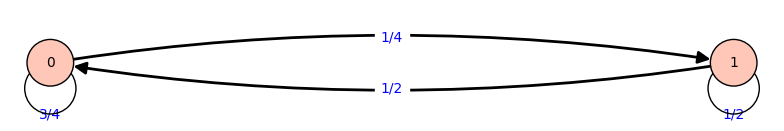

In [83]:
P = matrix([[3/4,1/4],[1/2,1/2]])  # construct and assign the matrix to P
p = DiGraph(P,format="weighted_adjacency_matrix")
pos_dict={}
pos_dict[0] = [1,1]
pos_dict[1] = [3,1]
p.plot(edge_labels=True,pos=pos_dict,vertex_size=300).show()

### YouTry

Consider the Markov chain describing the mode of transport used by a lazy professor. He has only two modes of transport, namely Walk or Drive. Label Walk by $0$ and Drive by $1$. If he walks today then he will definitely drive tomorrow. But, if he drives today then he flips a fair coin to decide whether he will Walk or Drive tomorrow. His decision to get to work is the same on each day. In the cells below try to:

- Find the flow diagram
- Find and assign the transition probability matrix for this Markov chain
- Find the probability that he will drive on the $n$-th day given he will walk today (day $0$)
- What is the steady state probability vector for this chain?

**Also do by hand!**

<br\> <br \> <br\> <br \>

# Random Walks and Random Graphs in SageMath

We get introduced to simple random walks in SageMath.

### Problem: 

Try to make simple Markov chain models as random walks on a lattice or a graph by 
modifying the following scripts.

Random Walks and Random Graphs in SageMath.

We get introduced to simple random walks in SageMath.

In [84]:
set_random_seed(0)
v = [randint(0,1) for _ in range(10)]
v

[0, 1, 0, 0, 1, 0, 1, 0, 1, 1]

In [85]:
sum(v)/float(len(v))

0.5

In [86]:
vv = []; nn = 0
@interact
def foo(pts = checkbox(True, "Show points"), 
        refresh = checkbox(False, "New random walk every time"),
        steps = (50,(10..500))):
    # We cache the walk in the global variable vv, so that
    # checking or unchecking the points checkbox doesn't change
    # the random walk. 
    html("<h2>%s steps</h2>"%steps)
    global vv
    if refresh or len(vv) == 0:
        s = 0; v = [(0,0)]
        for i in range(steps): 
             s += random() - 0.5
             v.append((i, s)) 
        vv = v
    elif len(vv) != steps:
        # Add or subtract some points
        s = vv[-1][1]; j = len(vv)
        for i in range(steps - len(vv)):
            s += random() - 0.5
            vv.append((i+j,s))
        v = vv[:steps]
    else:
        v = vv
    L = line(v, rgbcolor='#4a8de2')
    if pts: L += points(v, pointsize=10, rgbcolor='red')
    show(L, xmin=0, figsize=[8,3])

## A 3D Random Walk

This was done originally by William Stein.

In [87]:
@interact
def rwalk3d(n=(50,1000), frame=True):
    pnt = [0.,0.,0.]
    v = [copy(pnt)]
    for i in range(n):
        pnt[0] += random()-0.5
        pnt[1] += random()-0.5
        pnt[2] += random()-0.5
        v.append(copy(pnt))
    show(line3d(v,color='black'),aspect_ratio=[1,1,1],frame=frame,figsize=[6,6])

In [89]:
# recall Wiener Process!
showURL("https://en.wikipedia.org/wiki/Wiener_process#Wiener_process_as_a_limit_of_random_walk",300)

# Random Graphs

Graphs are a rich source of random discrete structures. Let us get a prelude into them next.

## Graph Browser, by Marshall Hampton

In [90]:
grs = ['BalancedTree', 'BullGraph', 'ChvatalGraph', 'CirculantGraph', 'CircularLadderGraph', 'ClawGraph', 'CompleteBipartiteGraph', 'CompleteGraph', 'CubeGraph', 'CycleGraph', 'DegreeSequence', 'DegreeSequenceConfigurationModel', 'DegreeSequenceExpected', 'DegreeSequenceTree', 'DesarguesGraph', 'DiamondGraph', 'DodecahedralGraph', 'DorogovtsevGoltsevMendesGraph', 'EmptyGraph', 'FlowerSnark', 'FruchtGraph', 'Grid2dGraph', 'GridGraph', 'HeawoodGraph', 'HexahedralGraph', 'HoffmanSingletonGraph', 'HouseGraph', 'HouseXGraph', 'IcosahedralGraph', 'KrackhardtKiteGraph', 'LCFGraph', 'LadderGraph', 'LollipopGraph', 'MoebiusKantorGraph', 'OctahedralGraph', 'PappusGraph', 'PathGraph', 'PetersenGraph', 'RandomBarabasiAlbert', 'RandomGNM', 'RandomGNP', 'RandomHolmeKim', 'RandomLobster', 'RandomNewmanWattsStrogatz', 'RandomRegular', 'RandomTreePowerlaw', 'StarGraph', 'TetrahedralGraph', 'ThomsenGraph', 'WheelGraph']
examples = {}
for g in grs:
    docs = eval('graphs.' + g + '.__doc__')
    for docline in docs.split('\n'):
        ex_loc = docline.find('graphs.' + g)
        if ex_loc != -1:
            end_paren_loc = docline[ex_loc:].find(')')
            ex_str = docline[ex_loc:end_paren_loc+ex_loc+1]
            ex_str = ex_str.replace('i+','2+')
            ex_str = ex_str.replace('(i','(4')
            break
    try:
        gt2 = eval(ex_str)
        examples[g] = ex_str
    except:
        grs.remove(g)
@interact
def graph_browser(graph_name = selector(grs, label = "Graph type:"), newargs = input_box('',type=str,label='tuple of args'), output_type = selector(['2D','3D'], default='2D')):
    base_g_str = 'graphs.' + graph_name
    docs = eval(base_g_str + '.__doc__')
    doc_ex_loc = docs.find('EXAMPLE')
    if docs.find('PLOTTING') != -1:
        doc_ex_loc = min(doc_ex_loc, docs.find('PLOTTING'))
    print docs[0:doc_ex_loc].replace('\n        ','\n')
    if newargs != '':
        try:
            t_graph = eval(base_g_str + newargs)
        except:
            print "Invalid arguments, using default"
            t_graph = eval(examples[graph_name])
    else: 
        t_graph = eval(examples[graph_name])
    if output_type == '2D': show(t_graph)
    if output_type == '3D': t_graph.show3d()

There is so much more to explore. If you are into stochastic processes on discrete structures with  continuous time aspects then check out:

- [http://doc.sagemath.org/html/en/reference/graphs/index.html](http://doc.sagemath.org/html/en/reference/graphs/index.html)